In [44]:
import numpy as np

class Perceptron(object):
    """
    Perceptron classifier

    Parameters
    ----------
    eta: float, Learning rate (between 0.0 and 1.0)
    n_iter: int, Passes over the training dataset
    random_state: int, Random tnumber generator seed for random weight initialization

    Attributes
    ----------
    W_: 1d-array, Weights after fitting
    errors_: list, Number of misclassification (updates) in each epoch
    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """
        Fit training data.

        Parameters
        ----------
        X: {array-like}, shape = [n_examples, n_ features]
            Training vectors, where n_examples is the number of examples and n_features is the number of features.
        y: array-like, shape = [n_examples]
            Target values.
        """

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                delta = self.eta * (target - self.predict(xi))
                self.w_[1:] += delta * xi
                self.w_[0] += delta
                errors += int(delta != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """"Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) > 0.0, 1, -1)

In [24]:
import os
import pandas as pd
df = pd.read_csv('C:\E\VsCode\Python Machine Learning\Python_Machine_Learning\datasets\iris\iris.data', header=None, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


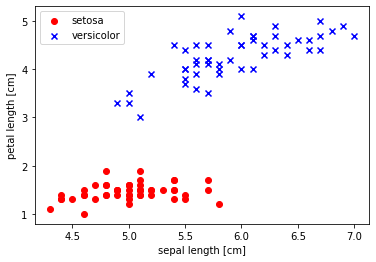

In [25]:
import matplotlib.pyplot as plt
import numpy as np

#Encode target
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

#Extract first two features
X = df.iloc[0:100, [0, 2]].values

#Plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

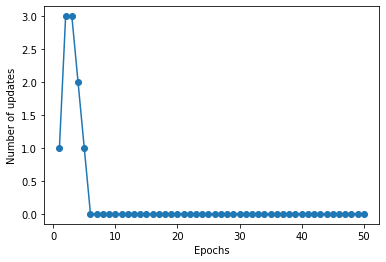

In [45]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()